### Carga de datos

In [12]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
%matplotlib inline
plt.style.use('default')
sns.set()

In [14]:
#Funciones auxiliares
def mostrar_porcentaje_barplot(ax):
    suma = 0
    for p in ax.patches:
        suma += p.get_height()
    for p in ax.patches:
        ax.annotate(str(np.round(100 *(p.get_height() / suma),decimals=2)) + "%", (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
def mostrar_valores_barplot(ax):
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [15]:
#Cargo el DataFrame
df = pd.read_csv('events.csv', low_memory = False, parse_dates = ['timestamp'], infer_datetime_format = True,
                    dtype = {'event': 'category','condition': 'category','storage': 'category', 'color': 'category', 'staticpage': 'category', 'campaign_source': 'category', 'search_engine': 'category', 'channel': 'category', 'new_vs_returning': 'category', 'region': 'category', 'country': 'category', 'device_type': 'category'})

### Analisis por dispositivo 

In [16]:
df['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

Text(0,0.5,'Cantidad de personas')

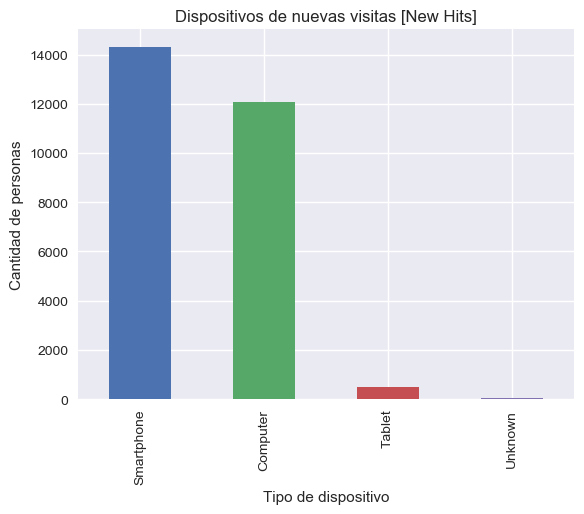

In [17]:
dispositivos_registrados = df.loc[(df['event']=='visited site'),['person','device_type','new_vs_returning']]
dispositivos_nuevos = dispositivos_registrados.loc[dispositivos_registrados['new_vs_returning']=='New']

g_dispositivos_nuevos = dispositivos_nuevos['device_type'].value_counts().plot('bar')
g_dispositivos_nuevos.set_title('Dispositivos de nuevas visitas [New Hits]')
g_dispositivos_nuevos.set_xlabel('Tipo de dispositivo')
g_dispositivos_nuevos.set_ylabel('Cantidad de personas')

Los unicos dispositivos relevantes son los de Smartphones y Computadoras

In [18]:
#Filtro las personas entraron por primera vez por su celular
personas_nuevas_smartphone = dispositivos_nuevos.loc[(dispositivos_nuevos['device_type']=='Smartphone'),['person']]

#Filtro paralelamente las personas que volvieron a entrar desde sus PCs
personas_returning_pc = dispositivos_registrados.loc[(dispositivos_registrados['device_type']=='Computer') & (df['new_vs_returning']=='Returning'),['person']]
personas_returning_pc['Volvieron_en_PC'] = True

In [19]:
personas_new_Smartphone_ret_PC = pd.merge(personas_nuevas_smartphone, personas_returning_pc, on='person', how='left').drop_duplicates()
personas_new_Smartphone_ret_PC['Volvieron_en_PC'].fillna(False,inplace=True)
personas_new_Smartphone_ret_PC.describe()

,person,Volvieron_en_PC
count,14305,14305
unique,14305,2
top,f455511d,False
freq,1,13971


#### Veo la cantidad de personas que entraron por primera vez a la página desde sus celulares y volvieron desde sus PCs

In [20]:
cantidad_personas_que_volvieron_enPC = personas_new_Smartphone_ret_PC['Volvieron_en_PC'].value_counts()
cantidad_personas_que_volvieron_enPC


False    13971
True       334
Name: Volvieron_en_PC, dtype: int64

Text(0,0.5,'Cantidad de personas')

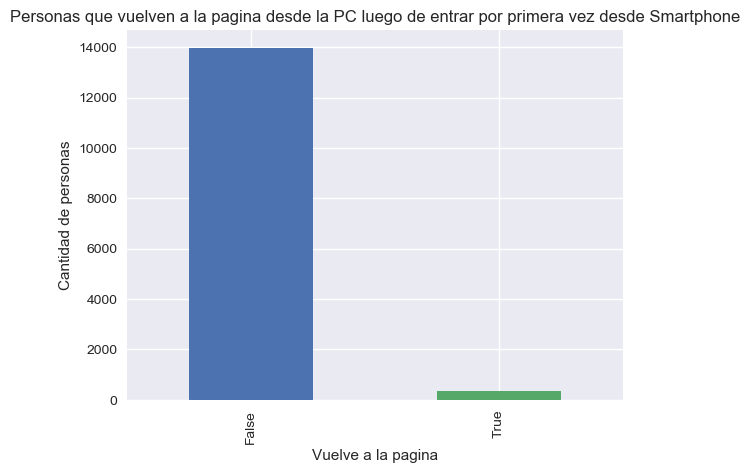

In [21]:
g_personas_ret_PC = cantidad_personas_que_volvieron_enPC.plot('bar')
g_personas_ret_PC.set_title('Personas que vuelven a la pagina desde la PC luego de entrar por primera vez desde Smartphone')
g_personas_ret_PC.set_xlabel('Vuelve a la pagina')
g_personas_ret_PC.set_ylabel('Cantidad de personas')

Se nota que no es representativa el numero de personas que entran primero a la pagina por sus celulares y luego vuelven a entrar desde la PC

#### Analizamos si de las personas que vuelven a entrar desde la PC (y que primero ingresaron con sus Smartphones) terminan realizando alguna compra

In [22]:
personas_que_compraron = df.loc[df['event']=='conversion',['person']].drop_duplicates()
personas_que_compraron['compro'] = True
personas_que_compraron.head()

,person,compro
220,00204059,True
2282,00c13dee,True
2547,00fdbb4b,True
4245,0146a9df,True
6985,01db2fe6,True


In [23]:
personas_vuelven_y_compran = pd.merge(personas_new_Smartphone_ret_PC, personas_que_compraron, on='person', how='left').drop_duplicates()
personas_vuelven_y_compran['compro'].fillna(False,inplace=True)
personas_vuelven_y_compran.loc[personas_vuelven_y_compran['Volvieron_en_PC']==True]['compro'].value_counts(normalize = True)

False    0.715569
True     0.284431
Name: compro, dtype: float64

Text(0,0.5,'Cantidad de personas')

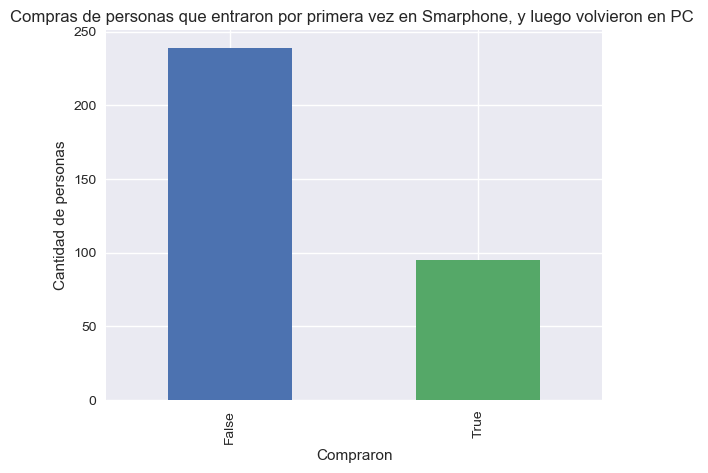

In [24]:
g5 = personas_vuelven_y_compran.loc[personas_vuelven_y_compran['Volvieron_en_PC']==True]['compro'].value_counts().plot('bar',)
g5.set_title("Compras de personas que entraron por primera vez en Smarphone, y luego volvieron en PC ")
g5.set_xlabel("Compraron")
g5.set_ylabel("Cantidad de personas")

Podemos ver que de las personas que volvieron a la pagina desde sus PCs luego de entrar desde sus SmartPhones, un 28,4% realizo compras